In [274]:
import pandas as pd
localTraff = pd.read_excel('국도통행량.xlsx') # on a weekday for 24h
localTraff.head()

,노선,호선,시작주소,도착주소,통행량
0,국도,3호,남해군,사천시,5666
1,국도,3호,사천시,진주시,36304
2,국도,3호,진주시,산청군,21402
3,국도,3호,산청군,함양군,6110
4,국도,3호,함양군,거창군,7236


In [275]:
localTraff = localTraff.rename(columns={'시작주소':'출발주소','통행량':'도내도로통행량'})
localTraff.head()

,노선,호선,출발주소,도착주소,도내도로통행량
0,국도,3호,남해군,사천시,5666
1,국도,3호,사천시,진주시,36304
2,국도,3호,진주시,산청군,21402
3,국도,3호,산청군,함양군,6110
4,국도,3호,함양군,거창군,7236


In [276]:
localTraff = localTraff.drop(columns=['노선','호선'])
localTraff.head()

,출발주소,도착주소,도내도로통행량
0,남해군,사천시,5666
1,사천시,진주시,36304
2,진주시,산청군,21402
3,산청군,함양군,6110
4,함양군,거창군,7236


In [277]:
localTraff.shape

(107, 3)

In [278]:
highTraffic = pd.read_csv('경남평일교통량평균.csv')
highTraffic.head()

,출발주소2,도착주소2,도착지방향평균
0,경기도,함양군,14.25
1,경기도,양산시,1.25
2,경기도,함안군,1.00
3,경기도,함안군,0.50
4,경기도,함안군,6.00


In [281]:
# highTraffic = highTraffic.drop('출발지방향평균', axis=1)
highTraffic = highTraffic.rename(columns={'출발주소2':'출발주소','도착주소2':'도착주소','도착지방향평균':'고속도로통행량'})
highTraffic.head()

,출발주소,도착주소,고속도로통행량
0,경기도,함양군,14.25
1,경기도,양산시,1.25
2,경기도,함안군,1.00
3,경기도,함안군,0.50
4,경기도,함안군,6.00


In [282]:
highTraffic.shape

(47141, 3)

In [283]:
# merge the two and sum traffic up
mdf = pd.merge(localTraff, highTraffic, how='outer')
mdf.head()

,출발주소,도착주소,도내도로통행량,고속도로통행량
0,강원도,거창군,NaN,0.00
1,강원도,거창군,NaN,0.25
2,강원도,거창군,NaN,0.25
3,강원도,거창군,NaN,0.25
4,강원도,거창군,NaN,0.25


In [284]:
mdf.shape

(48112, 4)

In [285]:
import numpy as np
# take the average of the four transition time without zero counted
tempZip = list(zip(mdf['도내도로통행량'].values,mdf['고속도로통행량'].values))
totalTraffic = []
for i in range(len(tempZip)):
    totalTraffic.append(np.nansum(tempZip[i]))
mdf['총통행량'] = pd.Series(totalTraffic)
mdf.head()

,출발주소,도착주소,도내도로통행량,고속도로통행량,총통행량
0,강원도,거창군,NaN,0.00,0.00
1,강원도,거창군,NaN,0.25,0.25
2,강원도,거창군,NaN,0.25,0.25
3,강원도,거창군,NaN,0.25,0.25
4,강원도,거창군,NaN,0.25,0.25


In [286]:
mdf = mdf.drop(columns=['도내도로통행량','고속도로통행량'])
mdf.head()

,출발주소,도착주소,총통행량
0,강원도,거창군,0.00
1,강원도,거창군,0.25
2,강원도,거창군,0.25
3,강원도,거창군,0.25
4,강원도,거창군,0.25


In [287]:
# draw network
import networkx as nx
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

In [288]:
nodeList = np.concatenate((mdf['출발주소'].values, mdf['도착주소'].values), axis=None)
nodeList = np.unique(nodeList)
nodeList

array(['강원도', '거제시', '거창군', '경기도', '경상북도', '고령군', '고성군', '광주광역시', '김해시',
       '남해군', '대구광역시', '대전광역시', '밀양시', '부산광역시', '사천시', '산청군', '세종특별자치시',
       '양산시', '예정', '울산광역시', '의령군', '전라남도', '전라북도', '진주시', '창녕군', '창원시',
       '충청남도', '충청북도', '통영시', '하동군', '함안군', '함양군', '합천군'], dtype=object)

In [289]:
dropIdx = mdf[(mdf['출발주소']=='예정')|(mdf['도착주소']=='예정')].index
mdf = mdf.drop(dropIdx)

In [290]:
mdf.head()

,출발주소,도착주소,총통행량
0,강원도,거창군,0.00
1,강원도,거창군,0.25
2,강원도,거창군,0.25
3,강원도,거창군,0.25
4,강원도,거창군,0.25


In [35]:
nodeList = np.concatenate((mdf['출발주소'].values, mdf['도착주소'].values), axis=None)
nodeList = np.unique(nodeList)
nodeList

array(['강원도', '거제시', '거창군', '경기도', '경상북도', '고령군', '고성군', '광주광역시', '김해시',
       '남해군', '대구광역시', '대전광역시', '밀양시', '부산광역시', '사천시', '산청군', '세종특별자치시',
       '양산시', '울산광역시', '의령군', '전라남도', '전라북도', '진주시', '창녕군', '창원시', '충청남도',
       '충청북도', '통영시', '하동군', '함안군', '함양군', '합천군'], dtype=object)

In [291]:
gmdf = mdf.groupby(['출발주소','도착주소']).sum()
gmdf

총통행량
출발주소 도착주소        
강원도  거창군     7.00
     고성군     1.00
     김해시   107.50
     밀양시    31.75
     사천시    13.50
...           ...
합천군  통영시     2.00
     하동군     0.25
     함안군    42.00
     함양군    13.25
     합천군     0.50

[629 rows x 1 columns]

In [292]:
gmdf.to_csv('gWeekdayTotalTrafficPair.csv',encoding='utf-8')

In [2]:
import pandas as pd

In [3]:
gmdf = pd.read_csv('gWeekdayTotalTrafficPair.csv')
gmdf.head()

,출발주소,도착주소,총통행량
0,강원도,거창군,7.00
1,강원도,고성군,1.00
2,강원도,김해시,107.50
3,강원도,밀양시,31.75
4,강원도,사천시,13.50


In [4]:
# check the existence of self-loops
gmdf[gmdf['출발주소']==gmdf['도착주소']]

,출발주소,도착주소,총통행량
18,거창군,거창군,597.50
80,고성군,고성군,1728.50
125,김해시,김해시,81341.75
188,밀양시,밀양시,9157.75
234,사천시,사천시,1241.25
263,산청군,산청군,276.50
309,양산시,양산시,2081.75
389,진주시,진주시,2416.75
419,창녕군,창녕군,425.50
448,창원시,창원시,6346.00


In [5]:
# drop them
dropIdx = gmdf[gmdf['출발주소']==gmdf['도착주소']].index
gmdf = gmdf.drop(dropIdx)

In [7]:
gmdf.to_csv('gmdf_reduced.csv')

In [48]:
nodeList = np.concatenate((gmdf['출발주소'].values, gmdf['도착주소'].values), axis=None)
nodeList = np.unique(nodeList)
nodeList

array(['강원도', '거제시', '거창군', '경기도', '경상북도', '고령군', '고성군', '광주광역시', '김해시',
       '남해군', '대구광역시', '대전광역시', '밀양시', '부산광역시', '사천시', '산청군', '세종특별자치시',
       '양산시', '울산광역시', '의령군', '전라남도', '전라북도', '진주시', '창녕군', '창원시', '충청남도',
       '충청북도', '통영시', '하동군', '함안군', '함양군', '합천군'], dtype=object)

In [49]:
edgeZip = zip(gmdf['출발주소'],gmdf['도착주소'])
edgeList = list(edgeZip)

In [37]:
import matplotlib.font_manager as fm
fm.fontManager.addfont('BinggraeII.ttf')

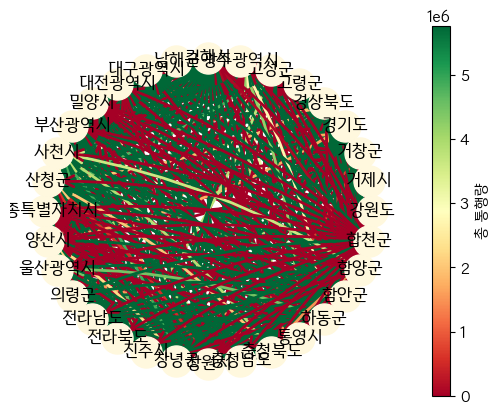

In [50]:
fig, ax = plt.subplots(1,1)
G = nx.Graph()
mpl.rcParams["font.family"] = 'Binggrae?'
cmap = plt.cm.RdYlGn
G.add_nodes_from(nodeList)
pos = nx.circular_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_size=500, node_color='#fff8de')
nx.draw_networkx_labels(G,pos,labels={i:i for i in nodeList},font_family='Binggrae?')
edges = nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edgeList,
    arrows=True,
    arrowstyle="->",
    connectionstyle='arc3,rad=0.1', # rad=0.1
    arrowsize=20,
    width=2,
    # edge_color=list(edge_colors),
    edge_color=gmdf['총통행량'].values,
    edge_vmin=68,
    edge_vmax=105,
    edge_cmap=cmap
)

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(gmdf['총통행량'].values)

ax = plt.gca()
ax.set_axis_off()
# norm = mpl.colors.Normalize(vmin=5, vmax=80)
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmapTraffic),
#              ax=ax, orientation='vertical', label='하루 평균 교통량 (천)', fraction=0.07, pad=0.05, location='left')
plt.colorbar(pc, ax=ax, label='총 통행량')
# plt.title('평일 출근시간 통행 속도', fontsize=18)
plt.show()

In [51]:
# make a copy of the dataframe gmdf and drop other provinces
idf = gmdf.copy()
dropIdx = idf[(idf['출발주소']=='강원도')|(idf['출발주소']=='경기도')|(idf['출발주소']=='경상북도')|
                (idf['출발주소']=='광주광역시')|(idf['출발주소']=='대구광역시')|(idf['출발주소']=='대전광역시')|(idf['출발주소']=='부산광역시')|
                (idf['출발주소']=='세종특별자치시')|(idf['출발주소']=='울산광역시')|(idf['출발주소']=='전라남도')|(idf['출발주소']=='전라북도')|
                (idf['출발주소']=='충청남도')|(idf['출발주소']=='충청북도')|
                (idf['도착주소']=='강원도')|(idf['도착주소']=='경기도')|(idf['도착주소']=='경상북도')|
                (idf['도착주소']=='광주광역시')|(idf['도착주소']=='대구광역시')|(idf['도착주소']=='대전광역시')|(idf['도착주소']=='부산광역시')|
                (idf['도착주소']=='세종특별자치시')|(idf['도착주소']=='울산광역시')|(idf['도착주소']=='전라남도')|(idf['도착주소']=='전라북도')|
                (idf['도착주소']=='충청남도')|(idf['도착주소']=='충청북도')].index
dropIdx

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       605, 607, 608, 610, 613, 615, 617, 618, 622, 623],
      dtype='int64', length=391)

In [52]:
idf = idf.drop(dropIdx)

In [53]:
nodeList = np.concatenate((idf['출발주소'].values, idf['도착주소'].values), axis=None)
nodeList = np.unique(nodeList)
nodeList

array(['거제시', '거창군', '고령군', '고성군', '김해시', '남해군', '밀양시', '사천시', '산청군',
       '양산시', '의령군', '진주시', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군'], dtype=object)

In [54]:
edgeZip = zip(idf['출발주소'],idf['도착주소'])
edgeList = list(edgeZip)

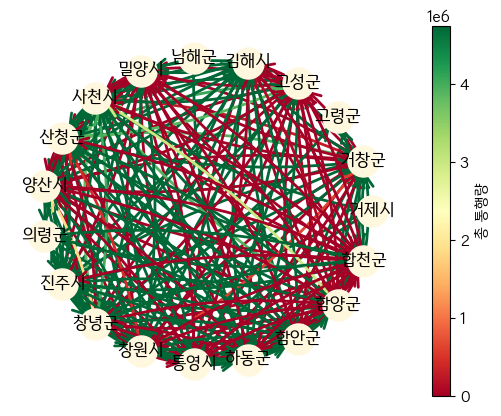

In [55]:
fig, ax = plt.subplots(1,1)
G = nx.Graph()
mpl.rcParams["font.family"] = 'Binggrae?'
cmap = plt.cm.RdYlGn
G.add_nodes_from(nodeList)
pos = nx.circular_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_size=500, node_color='#fff8de')
nx.draw_networkx_labels(G,pos,labels={i:i for i in nodeList},font_family='Binggrae?')
edges = nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edgeList,
    arrows=True,
    arrowstyle="->",
    connectionstyle='arc3,rad=0.1', # rad=0.1
    arrowsize=20,
    width=2,
    # edge_color=list(edge_colors),
    edge_color=idf['총통행량'].values,
    edge_vmin=68,
    edge_vmax=105,
    edge_cmap=cmap
)

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(idf['총통행량'].values)

ax = plt.gca()
ax.set_axis_off()
# norm = mpl.colors.Normalize(vmin=5, vmax=80)
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmapTraffic),
#              ax=ax, orientation='vertical', label='하루 평균 교통량 (천)', fraction=0.07, pad=0.05, location='left')
plt.colorbar(pc, ax=ax, label='총 통행량')
# plt.title('평일 출근시간 통행 속도', fontsize=18)
plt.show()

C:\Users\syj43\AppData\Local\Temp\ipykernel_23996\2666800644.py:2: RuntimeWarning: divide by zero encountered in log
  sns.displot(np.log(idf['총통행량'].values.tolist()))


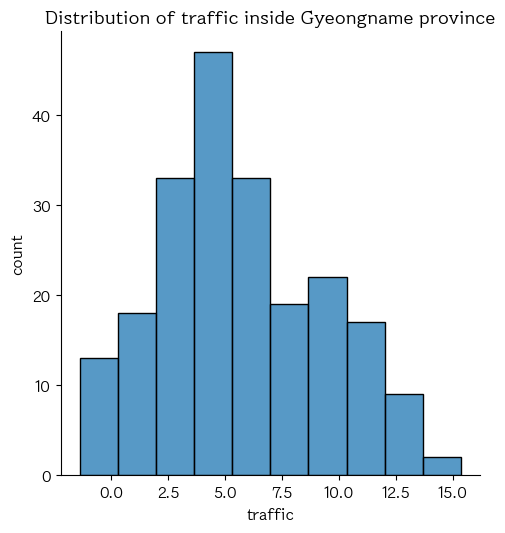

In [61]:
import seaborn as sns
sns.displot(np.log(idf['총통행량'].values.tolist()))
plt.xlabel('traffic')
plt.ylabel('count')
plt.title('Distribution of traffic inside Gyeongname province')
plt.show() # ~ normalized

In [ ]:
line_plot = sns.lineplot(x=x, y=y)
fig = line_plot.get_figure()
fig.savefig('my_lineplot.png') 

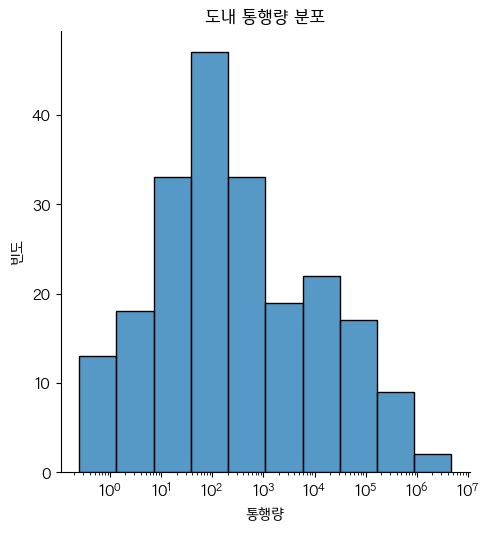

In [85]:
myplot = sns.displot(idf['총통행량'].values.tolist(), log_scale=10)
plt.xlabel('통행량')
plt.ylabel('빈도')
plt.title('도내 통행량 분포')
plt.show() # ~ normalized
myplot.figure.savefig("도내통행량분포.png")

In [62]:
idf.shape

(223, 3)

In [64]:
sidf = idf.sort_values(by='총통행량', ascending=False)
sidf

,출발주소,도착주소,총통행량
434,창원시,김해시,4733067.00
133,김해시,양산시,1190676.50
241,사천시,진주시,812614.00
453,창원시,함안군,765475.00
562,함안군,창녕군,448529.25
...,...,...,...
191,밀양시,산청군,0.00
190,밀양시,사천시,0.00
203,밀양시,하동군,0.00
495,통영시,밀양시,0.00


In [66]:
sidf['총통행량'] = sidf['총통행량'].apply(lambda x:int(x))
sidf.head()

,출발주소,도착주소,총통행량
434,창원시,김해시,4733067
133,김해시,양산시,1190676
241,사천시,진주시,812614
453,창원시,함안군,765475
562,함안군,창녕군,448529


In [67]:
sidf.to_csv('도내총통행량.csv',encoding='utf-8')

In [96]:
# single out routes whose traffic is more than 10k
# heavy traffic df
hdf = idf[idf['총통행량']>100000]
hdf

,출발주소,도착주소,총통행량
87,고성군,사천시,158384.25
96,고성군,창원시,205139.00
128,김해시,밀양시,249286.50
133,김해시,양산시,1190676.50
198,밀양시,창녕군,133065.00
241,사천시,진주시,812614.00
304,양산시,밀양시,103710.50
382,진주시,산청군,433545.00
409,창녕군,밀양시,279481.50
434,창원시,김해시,4733067.00


In [97]:
hdf['총통행량(십만)'] = hdf['총통행량'].apply(lambda x: int(x/100000))

C:\Users\syj43\AppData\Local\Temp\ipykernel_23996\1077545702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdf['총통행량(십만)'] = hdf['총통행량'].apply(lambda x: int(x/100000))


In [98]:
hdf

,출발주소,도착주소,총통행량,총통행량(십만)
87,고성군,사천시,158384.25,1
96,고성군,창원시,205139.00,2
128,김해시,밀양시,249286.50,2
133,김해시,양산시,1190676.50,11
198,밀양시,창녕군,133065.00,1
241,사천시,진주시,812614.00,8
304,양산시,밀양시,103710.50,1
382,진주시,산청군,433545.00,4
409,창녕군,밀양시,279481.50,2
434,창원시,김해시,4733067.00,47


In [99]:
nodeList = np.concatenate((hdf['출발주소'].values, hdf['도착주소'].values), axis=None)
nodeList = np.unique(nodeList)
edgeZip = zip(hdf['출발주소'],hdf['도착주소'])
edgeList = list(edgeZip)

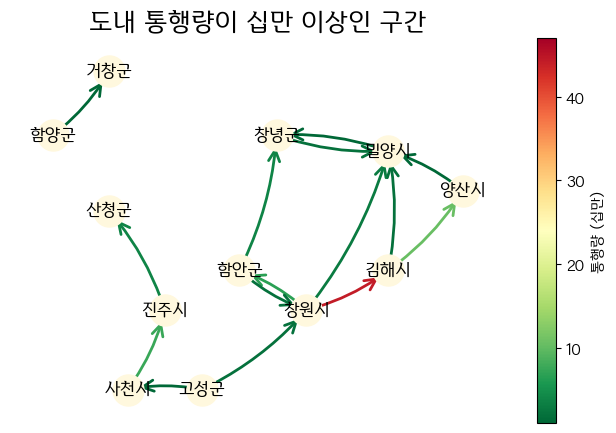

In [105]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
G = nx.Graph()
mpl.rcParams["font.family"] = 'Binggrae?'
cmap = plt.cm.RdYlGn.reversed()
G.add_nodes_from(nodeList)
# pos = nx.circular_layout(G)
pos = {'합천군':(300,520),'함양군':(150,520),'산청군':(225,425),'거창군':(225,600),'창녕군':(450,520),'하동군':(180,300)
      ,'고성군':(350,200),'통영시':(400,100),'사천시':(250,200),'진주시':(300,300),'밀양시':(600,500),'창원시':(490,300)
      ,'함안군':(400,350),'양산시':(700,450),'김해시':(600,350)}
nodes = nx.draw_networkx_nodes(G, pos, node_size=500, node_color='#fff8de')
nx.draw_networkx_labels(G,pos,labels={i:i for i in nodeList},font_family='Binggrae?')
edges = nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edgeList,
    arrows=True,
    arrowstyle="->",
    connectionstyle='arc3,rad=0.1', # rad=0.1
    arrowsize=20,
    width=2,
    # edge_color=list(edge_colors),
    edge_color=hdf['총통행량(십만)'].values,
    edge_vmin=1,
    edge_vmax=50,
    edge_cmap=cmap
)

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(hdf['총통행량(십만)'].values)

ax = plt.gca()
ax.set_axis_off()
# norm = mpl.colors.Normalize(vmin=5, vmax=80)
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmapTraffic),
#              ax=ax, orientation='vertical', label='하루 평균 교통량 (천)', fraction=0.07, pad=0.05, location='left')
plt.colorbar(pc, ax=ax, label='통행량 (십만)')
plt.title('도내 통행량이 십만 이상인 구간', fontsize=18)
plt.show()

In [175]:
# 창녕<->밀양과 같이 중복이 있는 구간을 처리
# df -> adj -> df
nList = np.concatenate((idf['출발주소'].values, idf['도착주소'].values), axis=None)
nList = np.unique(nList)
nList

array(['거제시', '거창군', '고령군', '고성군', '김해시', '남해군', '밀양시', '사천시', '산청군',
       '양산시', '의령군', '진주시', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군'], dtype=object)

In [226]:
# create an empty matrix to fill up
adjMatrix = pd.DataFrame(np.zeros((len(nList),len(nList))), columns=nList, index=nList)
adjMatrix.head()

,거제시,거창군,고령군,고성군,김해시,남해군,밀양시,사천시,산청군,양산시,의령군,진주시,창녕군,창원시,통영시,하동군,함안군,함양군,합천군
거제시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
거창군,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
고령군,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
고성군,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
김해시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
# while iterating over the rows, fill up the elements
for index, row in idf.iterrows():
    adjMatrix[row['출발주소']][row['도착주소']] += row['총통행량']
adjMatrix.head()

C:\Users\syj43\AppData\Local\Temp\ipykernel_23996\1096897666.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix[row['출발주소']][row['도착주소']] += row['총통행량']


,거제시,거창군,고령군,고성군,김해시,남해군,밀양시,사천시,산청군,양산시,의령군,진주시,창녕군,창원시,통영시,하동군,함안군,함양군,합천군
거제시,0.0,0.0,0.0,0.00,0.0,0.0,0.00,21790.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
거창군,0.0,0.0,0.0,22.75,179.5,0.0,0.00,66.75,5730.75,32.25,0.0,230.75,130.75,72.75,43.50,14.25,243.5,135846.75,5823.00
고령군,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,3828.00,0.00,0.00,0.00,0.0,0.00,1592.00
고성군,0.0,22.5,0.0,0.00,9.0,0.0,0.00,64728.50,98.25,0.75,0.0,21907.25,1.50,7.25,95398.25,118.75,52.5,28.75,0.25
김해시,0.0,173.0,0.0,10.00,0.0,0.0,6860.75,859.00,133.25,24850.50,0.0,1682.75,733.50,4733067.00,7.00,428.50,2623.0,68.75,31.50


In [197]:
adjMatrix.to_csv('trafficInsideGAjdMatrix.csv')

In [228]:
# add the lower triangle to the upper one
for i in range(len(nList)): #row
    for j in range(i+1,len(nList)): #col
        adjMatrix.iloc[i][j] += adjMatrix.iloc[j][i]
adjMatrix

C:\Users\syj43\AppData\Local\Temp\ipykernel_23996\3498381457.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adjMatrix.iloc[i][j] += adjMatrix.iloc[j][i]
C:\Users\syj43\AppData\Local\Temp\ipykernel_23996\3498381457.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the ass

,거제시,거창군,고령군,고성군,김해시,남해군,밀양시,사천시,산청군,양산시,의령군,진주시,창녕군,창원시,통영시,하동군,함안군,함양군,합천군
거제시,0.0,0.00,0.0,0.00,0.00,0.0,0.00,21790.00,0.00,0.00,0.0,0.00,0.00,8948.00,38332.00,0.00,0.00,0.00,0.00
거창군,0.0,0.00,0.0,45.25,352.50,0.0,24.75,137.00,5829.50,61.25,0.0,450.50,277.50,120.50,82.25,32.50,499.75,136122.00,10757.00
고령군,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,3828.00,0.00,0.00,0.00,0.00,0.00,1592.00
고성군,0.0,22.50,0.0,0.00,19.00,0.0,0.00,223112.75,198.00,1.50,0.0,104838.75,3.50,205146.25,102889.50,238.00,107.75,49.50,0.50
김해시,0.0,173.00,0.0,10.00,0.00,0.0,256147.25,1816.50,285.00,1215527.00,0.0,3443.75,1621.25,4749031.00,12.00,900.25,5402.00,131.50,63.50
남해군,0.0,0.00,0.0,0.00,0.00,0.0,0.00,5666.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,7302.00,0.00,0.00,0.00
밀양시,0.0,24.75,0.0,0.00,249286.50,0.0,0.00,0.75,0.00,148354.50,0.0,1.00,412546.50,377034.00,0.50,0.00,4.50,3.50,3.75
사천시,0.0,70.25,0.0,158384.25,957.50,5666.0,0.00,0.00,825.50,239.00,0.0,820625.50,197.00,732.25,1136.50,43819.50,4974.50,189.75,3.50
산청군,0.0,98.75,0.0,99.75,151.75,0.0,0.00,435.25,0.00,55.25,10586.0,485658.50,18.00,124.50,331.25,35079.25,671.50,155334.50,9609.75
양산시,0.0,29.00,0.0,0.75,1190676.50,0.0,44644.00,110.75,26.00,0.00,0.0,549.00,189.00,4002.50,2.25,127.25,619.50,27.50,8.25


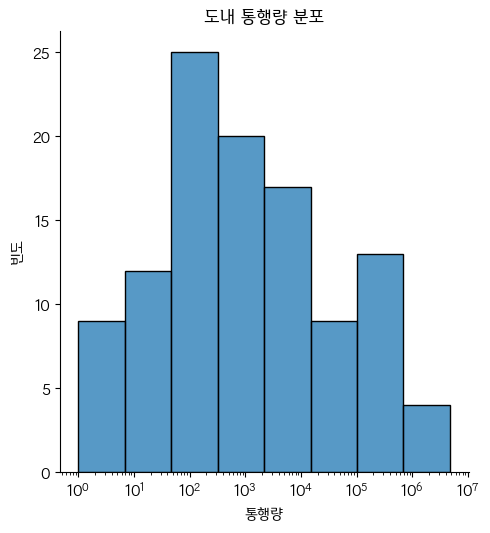

In [202]:
myplot = sns.displot(edgeColorList, log_scale=10)
plt.xlabel('통행량')
plt.ylabel('빈도')
plt.title('도내 통행량 분포')
plt.show() # ~ normalized
# myplot.figure.savefig("도내통행량분포.png")

In [229]:
# clear dialonal elements and those in the lower triangle
for i in range(len(nList)):
    for j in range(i):
        adjMatrix.iloc[i][j] = 0
adjMatrix.head()

C:\Users\syj43\AppData\Local\Temp\ipykernel_23996\3398866260.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adjMatrix.iloc[i][j] = 0
C:\Users\syj43\AppData\Local\Temp\ipykernel_23996\3398866260.py:4: FutureWarning: Series.__setitem__ tr

,거제시,거창군,고령군,고성군,김해시,남해군,밀양시,사천시,산청군,양산시,의령군,진주시,창녕군,창원시,통영시,하동군,함안군,함양군,합천군
거제시,0.0,0.0,0.0,0.00,0.0,0.0,0.00,21790.00,0.0,0.00,0.0,0.00,0.00,8948.00,38332.00,0.00,0.00,0.0,0.0
거창군,0.0,0.0,0.0,45.25,352.5,0.0,24.75,137.00,5829.5,61.25,0.0,450.50,277.50,120.50,82.25,32.50,499.75,136122.0,10757.0
고령군,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,3828.00,0.00,0.00,0.00,0.00,0.0,1592.0
고성군,0.0,0.0,0.0,0.00,19.0,0.0,0.00,223112.75,198.0,1.50,0.0,104838.75,3.50,205146.25,102889.50,238.00,107.75,49.5,0.5
김해시,0.0,0.0,0.0,0.00,0.0,0.0,256147.25,1816.50,285.0,1215527.00,0.0,3443.75,1621.25,4749031.00,12.00,900.25,5402.00,131.5,63.5


In [230]:
# store values in the upper triangle for edge color
edgeColorList = []
for i in range(len(nList)):
    for j in range(i+1,len(nList)):
        if adjMatrix.iloc[i][j]<0.1:
            continue
        else:
            edgeColorList.append(int(adjMatrix.iloc[i][j]))
edgeColorList[:10]

C:\Users\syj43\AppData\Local\Temp\ipykernel_23996\1969088070.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adjMatrix.iloc[i][j]<0.1:
C:\Users\syj43\AppData\Local\Temp\ipykernel_23996\1969088070.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  edgeColorList.append(int(adjMatrix.iloc[i][j]))


[21790, 8948, 38332, 45, 352, 24, 137, 5829, 61, 450]

In [231]:
len(edgeColorList)

113

In [232]:
for i in range(len(nList)):
    for j in range(len(nList)):
        if adjMatrix.iloc[i][j] == 0:
            adjMatrix.iloc[i][j] = np.nan
adjMatrix.head()

C:\Users\syj43\AppData\Local\Temp\ipykernel_23996\2898811704.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adjMatrix.iloc[i][j] == 0:
C:\Users\syj43\AppData\Local\Temp\ipykernel_23996\2898811704.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a si

,거제시,거창군,고령군,고성군,김해시,남해군,밀양시,사천시,산청군,양산시,의령군,진주시,창녕군,창원시,통영시,하동군,함안군,함양군,합천군
거제시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21790.00,NaN,NaN,NaN,NaN,NaN,8948.00,38332.00,NaN,NaN,NaN,NaN
거창군,NaN,NaN,NaN,45.25,352.5,NaN,24.75,137.00,5829.5,61.25,NaN,450.50,277.50,120.50,82.25,32.50,499.75,136122.0,10757.0
고령군,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3828.00,NaN,NaN,NaN,NaN,NaN,1592.0
고성군,NaN,NaN,NaN,NaN,19.0,NaN,NaN,223112.75,198.0,1.50,NaN,104838.75,3.50,205146.25,102889.50,238.00,107.75,49.5,0.5
김해시,NaN,NaN,NaN,NaN,NaN,NaN,256147.25,1816.50,285.0,1215527.00,NaN,3443.75,1621.25,4749031.00,12.00,900.25,5402.00,131.5,63.5


In [233]:
pair = adjMatrix.stack().index.values
pair

array([('거제시', '사천시'), ('거제시', '창원시'), ('거제시', '통영시'), ('거창군', '고성군'),
       ('거창군', '김해시'), ('거창군', '밀양시'), ('거창군', '사천시'), ('거창군', '산청군'),
       ('거창군', '양산시'), ('거창군', '진주시'), ('거창군', '창녕군'), ('거창군', '창원시'),
       ('거창군', '통영시'), ('거창군', '하동군'), ('거창군', '함안군'), ('거창군', '함양군'),
       ('거창군', '합천군'), ('고령군', '창녕군'), ('고령군', '합천군'), ('고성군', '김해시'),
       ('고성군', '사천시'), ('고성군', '산청군'), ('고성군', '양산시'), ('고성군', '진주시'),
       ('고성군', '창녕군'), ('고성군', '창원시'), ('고성군', '통영시'), ('고성군', '하동군'),
       ('고성군', '함안군'), ('고성군', '함양군'), ('고성군', '합천군'), ('김해시', '밀양시'),
       ('김해시', '사천시'), ('김해시', '산청군'), ('김해시', '양산시'), ('김해시', '진주시'),
       ('김해시', '창녕군'), ('김해시', '창원시'), ('김해시', '통영시'), ('김해시', '하동군'),
       ('김해시', '함안군'), ('김해시', '함양군'), ('김해시', '합천군'), ('남해군', '사천시'),
       ('남해군', '하동군'), ('밀양시', '사천시'), ('밀양시', '양산시'), ('밀양시', '진주시'),
       ('밀양시', '창녕군'), ('밀양시', '창원시'), ('밀양시', '통영시'), ('밀양시', '함안군'),
       ('밀양시', '함양군'), ('밀양시', '합천군'), ('사천시', '산청군'), ('사천시', '양산시'),
      

In [234]:
len(pair)

113

In [235]:
former = []
latter = []
for i in range(len(pair)):
    former.append(pair[i][0])
    latter.append(pair[i][1])

In [236]:
valueZip = zip(former,latter,edgeColorList)
valueZip = list(valueZip)
valueZip

[('거제시', '사천시', 21790),
 ('거제시', '창원시', 8948),
 ('거제시', '통영시', 38332),
 ('거창군', '고성군', 45),
 ('거창군', '김해시', 352),
 ('거창군', '밀양시', 24),
 ('거창군', '사천시', 137),
 ('거창군', '산청군', 5829),
 ('거창군', '양산시', 61),
 ('거창군', '진주시', 450),
 ('거창군', '창녕군', 277),
 ('거창군', '창원시', 120),
 ('거창군', '통영시', 82),
 ('거창군', '하동군', 32),
 ('거창군', '함안군', 499),
 ('거창군', '함양군', 136122),
 ('거창군', '합천군', 10757),
 ('고령군', '창녕군', 3828),
 ('고령군', '합천군', 1592),
 ('고성군', '김해시', 19),
 ('고성군', '사천시', 223112),
 ('고성군', '산청군', 198),
 ('고성군', '양산시', 1),
 ('고성군', '진주시', 104838),
 ('고성군', '창녕군', 3),
 ('고성군', '창원시', 205146),
 ('고성군', '통영시', 102889),
 ('고성군', '하동군', 238),
 ('고성군', '함안군', 107),
 ('고성군', '함양군', 49),
 ('고성군', '합천군', 0),
 ('김해시', '밀양시', 256147),
 ('김해시', '사천시', 1816),
 ('김해시', '산청군', 285),
 ('김해시', '양산시', 1215527),
 ('김해시', '진주시', 3443),
 ('김해시', '창녕군', 1621),
 ('김해시', '창원시', 4749031),
 ('김해시', '통영시', 12),
 ('김해시', '하동군', 900),
 ('김해시', '함안군', 5402),
 ('김해시', '함양군', 131),
 ('김해시', '합천군', 63),
 ('남해군', '사천시', 5666),
 ('남해군

In [237]:
# create DataFrame using data
# 
ipdf = pd.DataFrame.from_records(valueZip, columns =['municipality1', 'municipality2', 'traffic'] )
ipdf

,municipality1,municipality2,traffic
0,거제시,사천시,21790
1,거제시,창원시,8948
2,거제시,통영시,38332
3,거창군,고성군,45
4,거창군,김해시,352
...,...,...,...
108,하동군,함양군,13412
109,하동군,합천군,0
110,함안군,함양군,324
111,함안군,합천군,78


In [238]:
ipdf = ipdf.sort_values(by='traffic', ascending=False)
ipdf

,municipality1,municipality2,traffic
37,김해시,창원시,4749031
34,김해시,양산시,1215527
100,창원시,함안군,987777
56,사천시,진주시,820625
66,산청군,진주시,485658
...,...,...,...
47,밀양시,진주시,1
45,밀양시,사천시,0
30,고성군,합천군,0
50,밀양시,통영시,0


In [239]:
ipdf.to_csv('trafficInsideG.csv')

In [241]:
# traffic more than 0.1M
hdf = ipdf[ipdf['traffic']>100000]
hdf

,municipality1,municipality2,traffic
37,김해시,창원시,4749031
34,김해시,양산시,1215527
100,창원시,함안군,987777
56,사천시,진주시,820625
66,산청군,진주시,485658
95,창녕군,함안군,450542
48,밀양시,창녕군,412546
49,밀양시,창원시,377034
31,김해시,밀양시,256147
20,고성군,사천시,223112


In [243]:
nodeList = np.concatenate((hdf['municipality1'].values, hdf['municipality2'].values), axis=None)
nodeList = np.unique(nodeList)
edgeZip = zip(hdf['municipality1'],hdf['municipality2'])
edgeList = list(edgeZip)

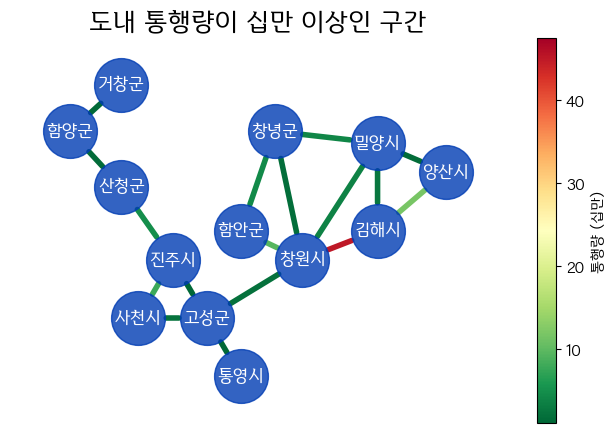

In [272]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
G = nx.Graph()
mpl.rcParams["font.family"] = 'Binggrae?'
cmap = plt.cm.RdYlGn.reversed()
G.add_nodes_from(nodeList)
# pos = nx.circular_layout(G)
pos = {'합천군':(300,520),'함양군':(150,520),'산청군':(225,425),'거창군':(225,600),'창녕군':(450,520),'하동군':(180,300)
      ,'고성군':(350,200),'통영시':(400,100),'사천시':(250,200),'진주시':(300,300),'밀양시':(600,500),'창원시':(490,300)
      ,'함안군':(400,350),'양산시':(700,450),'김해시':(600,350)}
nodes = nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='#003CB3', alpha=0.8)
nx.draw_networkx_labels(G,pos,labels={i:i for i in nodeList},font_family='Binggrae?',font_color='white')
edges = nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edgeList,
    arrows=True,
    arrowstyle="-",
    connectionstyle='arc3', # rad=0.1
    arrowsize=20,
    width=4,
    # edge_color=list(edge_colors),
    edge_color=hdf['traffic'].values/100000,
    edge_vmin=1,
    edge_vmax=50,
    edge_cmap=cmap,
    min_target_margin=20,
    min_source_margin=20
)

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(hdf['traffic'].values/100000)

ax = plt.gca()
ax.set_axis_off()
# norm = mpl.colors.Normalize(vmin=5, vmax=80)
# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmapTraffic),
#              ax=ax, orientation='vertical', label='하루 평균 교통량 (천)', fraction=0.07, pad=0.05, location='left')
plt.colorbar(pc, ax=ax, label='통행량 (십만)')
plt.title('도내 통행량이 십만 이상인 구간', fontsize=18)
plt.margins(0.1,0.1)
plt.show()

In [273]:
fig.savefig('도내교통량이십만이상인구간.png')

In [302]:
# network towards other provinces
# it must be strongly connected to Busan..
# make a copy of the dataframe gmdf and drop internal traffic
odf = gmdf.copy()
odf = odf[(odf['출발주소']=='강원도')|(odf['출발주소']=='경기도')|(odf['출발주소']=='경상북도')|
                (odf['출발주소']=='광주광역시')|(odf['출발주소']=='대구광역시')|(odf['출발주소']=='대전광역시')|(odf['출발주소']=='부산광역시')|
                (odf['출발주소']=='세종특별자치시')|(odf['출발주소']=='울산광역시')|(odf['출발주소']=='전라남도')|(odf['출발주소']=='전라북도')|
                (odf['출발주소']=='충청남도')|(odf['출발주소']=='충청북도')|
                (odf['도착주소']=='강원도')|(odf['도착주소']=='경기도')|(odf['도착주소']=='경상북도')|
                (odf['도착주소']=='광주광역시')|(odf['도착주소']=='대구광역시')|(odf['도착주소']=='대전광역시')|(odf['도착주소']=='부산광역시')|
                (odf['도착주소']=='세종특별자치시')|(odf['도착주소']=='울산광역시')|(odf['도착주소']=='전라남도')|(odf['도착주소']=='전라북도')|
                (odf['도착주소']=='충청남도')|(odf['도착주소']=='충청북도')]
odf

,출발주소,도착주소,총통행량
0,강원도,거창군,7.00
1,강원도,고성군,1.00
2,강원도,김해시,107.50
3,강원도,밀양시,31.75
4,강원도,사천시,13.50
...,...,...,...
615,합천군,울산광역시,11.25
617,합천군,전라남도,12.00
618,합천군,전라북도,24.75
622,합천군,충청남도,2.75


In [303]:
odf.to_csv('towardsOtherProvince.csv')